In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

## $\varepsilon$-convergence + Penalty Function Revision

### Penalty Function - Hàm Phạt

Hàm phạt được sử dụng trong các bài toán tối ưu hóa để xử lý các ràng buộc bằng cách tích hợp chúng vào hàm mục tiêu. Điều này cho phép bài toán tối ưu hóa có ràng buộc:

\begin{align}
&\min_{\mathbf{x}} f(\mathbf{x}) \\
\text{s.t} \quad &g_i(\mathbf{x}) \leq 0, \, h_j(\mathbf{x}) = 0
\end{align}

được chuyển thành một bài toán không có ràng buộc:

$$
\min_{\mathbf{x}} f(\mathbf{x}) + r P(\mathbf{x}),
$$

trong đó:
- $f(\mathbf{x})$: Hàm mục tiêu ban đầu.
- $P(\mathbf{x})$: Hàm phạt, đại diện cho mức độ vi phạm các ràng buộc.
- $r > 0$: Hệ số phạt, kiểm soát mức độ tác động của hàm phạt.

**Hàm phạt ngoại vi bậc 2 (Quadratic exterior Penalty Functions)**:  
Phạt nếu nghiệm vi phạm ràng buộc. Ví dụ:

$$
P(\mathbf{x}) = \sum_{i=1}^m \max(0, g_i(\mathbf{x}))^2
$$

**Ví dụ về bài toán lập trình tuyến tính**

Xét bài toán tối ưu hóa tuyến tính sau:

\begin{align}
&\min_{x_1, x_2} \, f(x_1, x_2) = 3x_1 + 2x_2\\
\text{s.t} \quad &x_1 + x_2 \geq 4 \\
&2x_1 + x_2 \leq 8 \\
&x_1 \geq 0,\, x_2 \geq 0
\end{align}

#### Lời giải

Để giải bài toán này bằng cách sử dụng hàm phạt ngoại vi bậc hai, chúng ta chuyển ràng buộc bất đẳng thức thành các hàm phạt:

1. $x_1 + x_2 \geq 4 \implies g_1(x_1, x_2) = \max(0, 4 - (x_1 + x_2))^2$,
2. $2x_1 + x_2 \leq 8 \implies g_2(x_1, x_2) = \max(0, (2x_1 + x_2) - 8)^2$,
3. $x_1 \geq 0 \implies g_3(x_1) = \max(0, -x_1)^2$,
4. $x_2 \geq 0 \implies g_4(x_2) = \max(0, -x_2)^2$.

Hàm phạt tổng quát được viết dưới dạng:

$$
P(x_1, x_2) = g_1(x_1, x_2) + g_2(x_1, x_2) + g_3(x_1) + g_4(x_2).
$$
Bài toán tối ưu ban đầu được chuyển thành bài toán không ràng buộc:

$$
\min_{x_1, x_2} \, F_{r}(x_1, x_2) = f(x_1, x_2) + r \cdot P(x_1, x_2),
$$

trong đó $r > 0$ là hệ số phạt.

Với cụ thể $f(x_1, x_2) = 3x_1 + 2x_2$ và các hàm phạt, bài toán cuối cùng được viết dưới dạng:

$$
\min_{x_1, x_2} \, F_{r}(x_1, x_2) = 3x_1 + 2x_2 + r \cdot \Big[ \max(0, 4 - (x_1 + x_2))^2 + \max(0, (2x_1 + x_2) - 8)^2 + \max(0, -x_1)^2 + \max(0, -x_2)^2 \Big].
$$

C:\Users\Minhk\AppData\Local\Temp\ipykernel_24180\653121607.py:99: UserWarning: No contour levels were found within the data range.
  ax.contour(X1, X2, Z, levels=[optimal_value], colors="magenta", linewidths=2, linestyles="--")


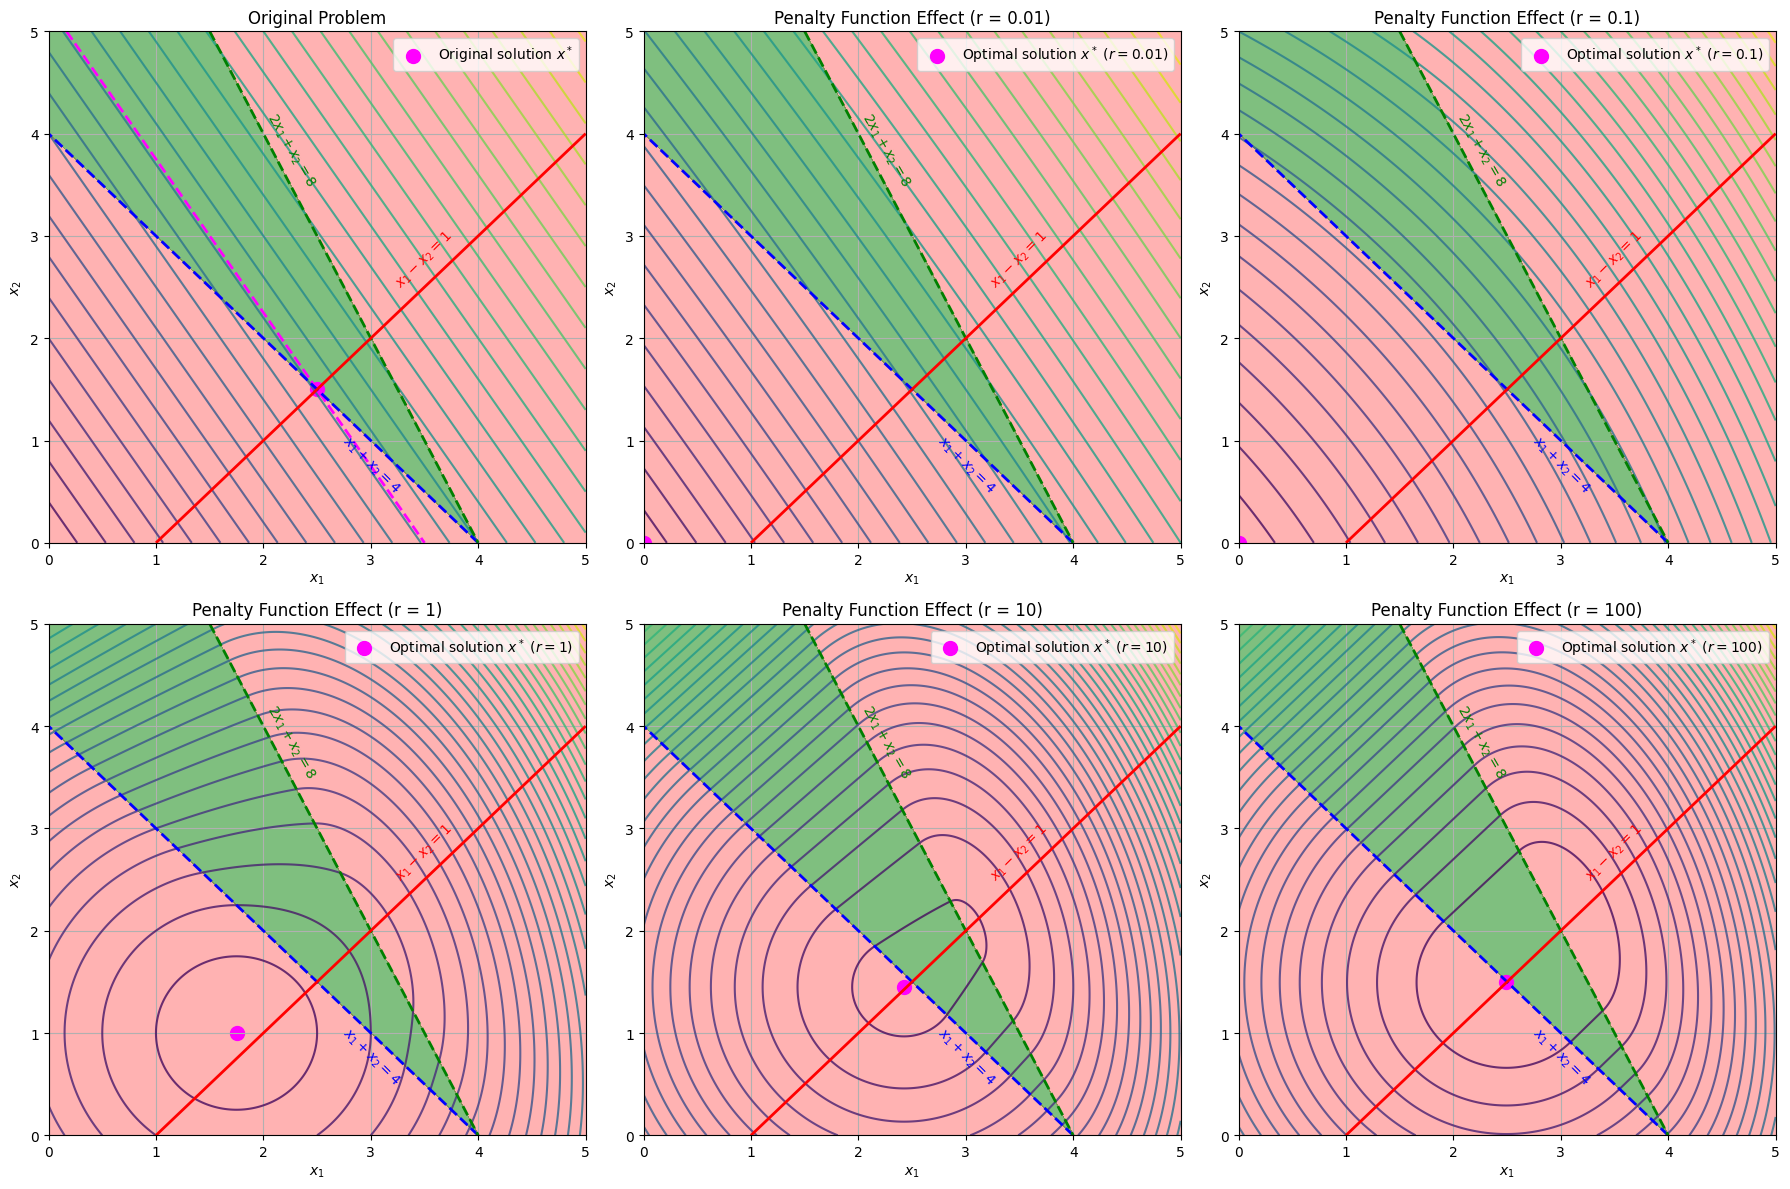

In [2]:
# Define the original objective function
def objective(x1, x2):
    return 3 * x1 + 2 * x2

# Define inequality constraints
def g1(x1, x2):
    return 4 - (x1 + x2)  # Inequality: x1 + x2 >= 4 -> g1 <= 0

def g2(x1, x2):
    return (2 * x1 + x2) - 8  # Inequality: 2x1 + x2 <= 8 -> g2 <= 0

# Define equality constraint
def eq_constraint(x1, x2):
    return x1 - x2 - 1  # Equality: x1 - x2 = 1 -> eq_constraint = 0

# Define penalty function (include the equality constraint)
def penalty(x1, x2):
    inequality_penalty = max(0, g1(x1, x2)) ** 2 + max(0, g2(x1, x2)) ** 2
    equality_penalty = eq_constraint(x1, x2) ** 2
    return inequality_penalty + equality_penalty

# Define augmented objective function
def augmented_objective(x1, x2, r):
    return objective(x1, x2) + r * penalty(x1, x2)

# Grid for visualization
x1_vals = np.linspace(0, 5, 500)
x2_vals = np.linspace(0, 5, 500)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Evaluate inequality constraints
feasible_mask = (g1(X1, X2) <= 0) & (g2(X1, X2) <= 0)  # Feasible region mask (ignores equality constraint)
infeasible_mask = ~feasible_mask  # Infeasible region mask

# Penalty weights to visualize
r_values = [None, 0.01, 0.1, 1, 10, 100]  # First plot is original problem (no penalty)

# Setup grid dimensions
n_cols = 3
n_rows = int(np.ceil(len(r_values) / n_cols))

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 6 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot for each case (original + penalized problems)
for idx, r in enumerate(r_values):
    ax = axes[idx]

    if r is None:  # Original problem (no penalty)
        # Solve the original LP with CVXPY
        x1_var = cp.Variable()
        x2_var = cp.Variable()
        problem = cp.Problem(cp.Minimize(3 * x1_var + 2 * x2_var),
                             [x1_var + x2_var >= 4, 
                              2 * x1_var + x2_var <= 8, 
                              x1_var - x2_var == 1,
                              x1_var >= 0, 
                              x2_var >= 0])
        problem.solve()

        # Optimal solution and value for the original problem
        optimal_x1, optimal_x2 = x1_var.value, x2_var.value
        optimal_value = problem.value

        # Compute objective function values
        Z = np.array([[objective(x1, x2) for x1, x2 in zip(x1_row, x2_row)]
                      for x1_row, x2_row in zip(X1, X2)])

    else:  # Penalized problem
        # Solve the augmented problem with penalty
        x1_var = cp.Variable()
        x2_var = cp.Variable()
        augmented_obj = (3 * x1_var + 2 * x2_var +
                         r * (cp.pos(g1(x1_var, x2_var)) ** 2 +
                              cp.pos(g2(x1_var, x2_var)) ** 2 +
                              (x1_var - x2_var - 1) ** 2))
        problem = cp.Problem(cp.Minimize(augmented_obj), [x1_var >= 0, x2_var >= 0])
        problem.solve()

        # Optimal solution and value for the penalized problem
        optimal_x1, optimal_x2 = x1_var.value, x2_var.value
        optimal_value = problem.value

        # Compute augmented objective function values
        Z = np.array([[augmented_objective(x1, x2, r) for x1, x2 in zip(x1_row, x2_row)]
                      for x1_row, x2_row in zip(X1, X2)])

    # Highlight infeasible region (red)
    ax.contourf(X1, X2, infeasible_mask, levels=[0.5, 1], colors=["red"], alpha=0.3)

    # Highlight feasible region (green)
    ax.contourf(X1, X2, feasible_mask, levels=[0.5, 1], colors=["green"], alpha=0.5)

    # Contour plot of the objective function
    contours = ax.contour(X1, X2, Z, levels=40, cmap="viridis", alpha=0.8)

    # Add the optimal contour
    ax.contour(X1, X2, Z, levels=[optimal_value], colors="magenta", linewidths=2, linestyles="--")

    # Plot inequality constraint lines
    ax.contour(X1, X2, g1(X1, X2), levels=[0], colors="blue", linestyles="--", linewidths=2)
    ax.contour(X1, X2, g2(X1, X2), levels=[0], colors="green", linestyles="--", linewidths=2)

    # Plot equality constraint line
    ax.contour(X1, X2, eq_constraint(X1, X2), levels=[0], colors="red", linestyles="-", linewidths=2)

    # Add text annotations for constraints
    ax.text(3, 0.5, "$x_1 + x_2 = 4$", color="blue", fontsize=10, rotation=-45, ha="center")
    ax.text(2.25, 3.5, "$2x_1 + x_2 = 8$", color="green", fontsize=10, rotation=-60, ha="center")
    ax.text(3.5, 2.5, "$x_1 - x_2 = 1$", color="red", fontsize=10, rotation=45, ha="center")

    # Plot the optimal solution
    ax.scatter(optimal_x1, optimal_x2, color="magenta", s=100, label=f"Optimal solution $x^*$ ($r={r}$)" if r else "Original solution $x^*$")

    # Add labels and title
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_title(f"Original Problem" if r is None else f"Penalty Function Effect (r = {r})")
    ax.axhline(0, color="black", linewidth=0.5)
    ax.axvline(0, color="black", linewidth=0.5)
    ax.legend(loc="upper right", fontsize=10)
    ax.grid(True)

# Remove unused axes
for ax in axes[len(r_values):]:
    fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()


### Hội tụ epsilon ($\varepsilon$-convergence)

Trong tối ưu hóa, khái niệm **hội tụ epsilon** ($\varepsilon$-convergence) được sử dụng để mô tả quá trình một thuật toán hoặc nghiệm của một bài toán tiến gần đến giá trị tối ưu với độ chính xác được xác định bởi một ngưỡng $\varepsilon > 0$. Nó đặc biệt quan trọng trong việc xử lý các bài toán có ràng buộc, trong đó nghiệm khả thi có thể chỉ được đạt đến gần đúng.

**Định nghĩa**

Cho bài toán tối ưu dạng tổng quát:

$$
\min_{x \in \mathcal{X}} f(x)
$$

với các ràng buộc bất đẳng thức:

$$
g_i(x) \leq k, \quad \forall i = 1, \dots, m,
$$

một nghiệm $x^*$ được gọi là **nghiệm hội tụ epsilon** nếu:

1. Giá trị hàm mục tiêu thỏa mãn:
   $$
   f(x^*) - f^* \leq \varepsilon,
   $$
   trong đó $f^*$ là giá trị tối ưu toàn cục.

2. Các ràng buộc bất đẳng thức được thỏa mãn gần đúng:
   $$
   g_i(x^*) \leq k + \varepsilon, \quad \forall i.
   $$

**Điều kiện đạt $\varepsilon$-Convergence**

Để đạt $\varepsilon$-convergence, ta cần chọn một giá trị $r_\varepsilon $ đủ lớn để đảm bảo 2 điều kiện trên
Dựa vào Lemma 1 và các định nghĩa trong bài toán hàm phạt ngoại vi, giá trị $r_\varepsilon$ được tính như sau:
$$
r_\varepsilon = \frac{r_0}{\varepsilon / h},
$$
với:
- $r_0 = \max_i u_i^0$, trong đó $u_i^0 \geq 0$ là nhân tử Lagrange tại điểm yên ngựa $(x^0, u^0)$,
- $h = \frac{\sqrt{m} + 1}{2}$, với $m$ là số ràng buộc bất đẳng thức.

Tuy nhiên, việc tìm giá trị $r_0$ khá khó, vì thế chúng ta có thể tạo ra một giá trị $\bar{r} \geq \max_i u_i^0$ bằng công thức $\bar{r} > \frac{z - f(\bar{x})}{\min_ig_i(\bar{x})}$ với $z$ là giá trị maximum của hàm $f(x)$

Từ đó, công thức có thể được viết lại thành 
$$
r_\varepsilon = \frac{\bar{r}}{\varepsilon / h},
$$

#### Chứng minh công thức $r_\varepsilon$

Cho bài toán tối ưu dạng tổng quát:

$$
\min_{x \in \mathcal{X}} f(x)
$$

với các ràng buộc bất đẳng thức:

$$
g_i(x) \leq k, \quad \forall i = 1, \dots, m,
$$

Giả sử $x^*$ là nghiệm gần đúng cho bài toán tối ưu với hàm phạt ngoại vi:

$$
P(x, r) = f(x) + r \cdot \sum_{i=1}^m \max(0, g_i(x) - k)^2,
$$

trong đó $r > 0$ là hệ số phạt và $k$ là giá trị ràng buộc của $g_i(x) \leq k$.

Để chứng minh là $P(x, r)$ hội tụ $\varepsilon$ khi $r_\varepsilon$ đạt giá trị trên, ta căn bản chứng minh $P(x^*, r)$, hay chính xác hơn là $f(x^*) >= f*$.

Giả sử $x^*$ giúp $P(x^*, r_\varepsilon)$ đạt giá trị nhỏ nhất, nhưng chưa thỏa mãn hội tụ epsilon. Ta gọi tập hợp các điều kiện ràng buộc thứ i vi phạm hội tụ epsilon là I:
\begin{align*}
I &= \{i | g_i(x^*) > k + \varepsilon\} \\
J &= \{i | g_i(x^*) \leq k + \varepsilon\}
\end{align*}

Với điều kiện giả sử trên, tồn tại ít nhất một điều kiện ràng buộc không đạt điều kiện hội tụ $\varepsilon-convergence$, tức là $I \neq \empty$ và số phần tử nhiều nhất mà $J$ có thể đạt được là $J = m-1$

+ Từ việc chúng ta có 2 tập hợp các điều kiện ràng buộc $I$ và $J$, chúng ta viết lại $P(x^*, r_\varepsilon)$ như sau:
\begin{align*}
P(x^*, r_\varepsilon) &= f(x^*) + r_\varepsilon\sum^m_{i=1}\left[min(0, k - g_i(x^*))\right]^2 \quad \text(*)\\ 
&=  f(x^*) + r_\varepsilon\sum_{i \in I}\left[g_i(x^*) - k\right]^2 + r_\varepsilon\sum_{i \in J}\left[g_i(x^*) - k\right]^2 \quad \text(**)
\end{align*}
+ Ở đây, chúng ta biết là $g_i(x^*)$ khi $i \in I$ và khi $i \in J$ đều dư ra một giá trị nhất định (do có hội tụ epsilon hay không thì $g_i(x^*)$ cũng vi phạm các điều kiện ràng buộc dù ít hay nhiều). Nên chúng ta tách hàm phạt từ (*) ra thành tổng phần dư đạt được của $g_i(x^*)$ khi $i \in I$ và của $g_i(x^*)$ khi $i \in J$ ở (**) 
+ Sử dụng giá trị của $r_\varepsilon$ ở trên, ta phân tích riêng trường hợp $i \in I$:
    + Thế $r_\varepsilon$ thành $r_0$ và cộng trừ thêm giá trị $\sum_{i\in I}|g_i(x^*) - k|$
    $$r_\varepsilon\sum_{i \in I}\left[g_i(x^*) - k\right]^2 = r_0\sum_{i\in I}|g_i(x^*) - k| + r_0\sum_{i \in I}\left[\frac{(g_i(x^*) - k)^2}{\varepsilon/h} - |g_i(x^*) - k|\right]$$
    + Khi $g_i(x^*) - k$ với các $i \in I$, $|g_i(x^*) - k| > \varepsilon \leq varepsilon/h$, gọi $y = |g_i(x^*) - k|$:
    $$d(y) = \sum_{i \in I}\left[\frac{(g_i(x^*) - k)^2}{\varepsilon/h} - |g_i(x^*) - k|\right] = \frac{y^2}{\varepsilon/h} - y > 0 \quad \forall y > \varepsilon$$
    + Với tính chất d(y) là hàm đơn điệu tăng $\forall y > \varepsilon$ (hàm d(y) là parabol):
    $$d(y) > \frac{\varepsilon^2}{\varepsilon/h} - \varepsilon$$ 
    + Thế vào đẳng thức ban đầu thì ta có:
    $$r_\varepsilon\sum_{i \in I}\left[g_i(x^*) - k\right]^2 > r_0\sum_{i\in I}|g_i(x^*) - k| + r_0\frac{\varepsilon^2}{\varepsilon/h} - \varepsilon = r_0\sum_{i\in I}|g_i(x^*) - k| + r_0\varepsilon(h-1)  \quad \text{(1)}$$
+ Sử dụng giá trị của $r_\varepsilon$ ở trên, ta phân tích riêng trường hợp $i \in J$:
    + Thế $r_\varepsilon$ thành $r_0$ và cộng trừ thêm giá trị $\sum_{i\in J}|g_i(x^*) - k|$
    $$r_\varepsilon\sum_{i \in J}\left[g_i(x^*) - k\right]^2 = r_0\sum_{i\in J}|g_i(x^*) - k| + r_0\sum_{i \in J}\left[\frac{(g_i(x^*) - k)^2}{\varepsilon/h} - |g_i(x^*) - k|\right]$$
    + Lại đặt $y = |g_i(x^*) - k|$. Khi $g_i(x^*) - k$ với các $i \in J$, $0 \leq |g_i(x^*) - k| \leq \varepsilon$:
    $$d(y) = \sum_{i \in J}\left[\frac{(g_i(x^*) - k)^2}{\varepsilon/h} - |g_i(x^*) - k|\right] = \frac{y^2}{\varepsilon/h} - y$$
    + Nhận thấy rằng, khi $0 \leq y \leq \varepsilon$, hàm $d(y)$ với dạng parabol đạt giá trị cực tiểu tại $y = \frac{epsilon}{2}$. Thế giá trị cực tiểu đó vào $y$, ta được:
    $$d(y) \geq  -\frac{\varepsilon}{4h}$$
    + Nhớ lại về việc là số phần tử nhiều nhất mà $J$ có thể đạt được là $J = m-1$:
    $$r_\varepsilon\sum_{i \in J}\left[g_i(x^*) - k\right]^2 \geq  r_0\sum_{i\in J}|g_i(x^*) - k| - r_0(m-1)\frac{\varepsilon}{4h} \quad \text{(2)}$$
+ Gộp (1) và (2) vào (*), sử dụng tính chất $h = \frac{\sqrt{m} + 1}{2}$:
\begin{align*}
P(x^*, r_\varepsilon) &= f(x^*) + r_\varepsilon\sum_{i \in I}\left[g_i(x^*) - k\right]^2 + r_\varepsilon\sum_{i \in J}\left[g_i(x^*) - k\right]^2\\ 
&=  f(x^*) + r_\varepsilon\sum^m_{i=1}\left[min(0, k - g_i(x^*))\right]^2\\
&> f(x^*) + r_0\sum_{i\in I}|g_i(x^*)-k| + r_0\sum_{i\in J}|g_i(x^*) - k| + r_0\varepsilon (h-1) - r_0(m-1)\frac{\varepsilon}{4h} \\
&= f(x^*) + r_0\sum_{i\in I}|g_i(x^*)-k| + r_0\sum_{i\in J}|g_i(x^*) - k| + r_0\varepsilon\frac{1}{2}( (\sqrt{m}-1) - \frac{(m-1)}{\sqrt{m}-1}) \\
&> f(x^*) + r_0\sum_{i\in I}|g_i(x^*)-k| + r_0\sum_{i\in J}|g_i(x^*) - k|\\
&> f*
\end{align*}

Điều này chứng tỏ rằng là khi $h$ và $r_\varepsilon$ đạt các giá trị trên thì $P(x^*, r_\varepsilon)$ đạt giá trị tối ưu và điều chúng ta giả sử là $I \neq \empty$ là sai. Đồng thời, để dễ dàng tính được giá trị $r_\varepsilon$ thì thay vì đối chiếu với $r_0$ thì ta dùng $\bar{r}$ để dễ tính hơn.

**Kết luận**  
Mục tiêu của chúng ta là chứng minh **hội tụ $\varepsilon$** của $ P(x, r) $, tức là đảm bảo rằng với $ r_\varepsilon $ đủ lớn, nghiệm $ x^* $ tìm được từ việc tối ưu hóa $ P(x, r_\varepsilon) $ thỏa mãn các ràng buộc $ g_i(x^*) \leq k $ và đạt giá trị mục tiêu xấp xỉ tối ưu $ f^* $ của bài toán ban đầu.

Để làm điều này:
1. Ta phân tích $ P(x^*, r_\varepsilon) $ thành các thành phần liên quan đến hai tập $ I $ (các ràng buộc bị vi phạm) và $ J $ (các ràng buộc gần đạt).
2. Thông qua phân tích các thành phần này, ta chứng minh rằng khi $ r_\varepsilon \to \infty $, các hàm phạt tương ứng với $ I $ và $ J $ sẽ hoặc giảm dần về 0 (đối với $ J $) hoặc bị phạt đủ lớn để loại bỏ khả năng $ g_i(x^*) > k + \varepsilon $ (đối với $ I $).
3. Điều này buộc $ x^* $ phải thỏa mãn $ g_i(x^*) \leq k $ với mọi $ i $ và đảm bảo điều kiện tối ưu $ f(x^*) \geq f^* $.

Phần quan trọng của chứng minh nằm ở:
- Các thành phần của hàm phạt được triệt tiêu khi $ h = \frac{\sqrt{m} + 1}{2} $, đảm bảo không có mâu thuẫn trong cấu trúc của $ P(x^*, r_\varepsilon) $.
- $ f(x^*) > f^* $ dẫn đến việc $ x^* $ không thể vi phạm các ràng buộc khi $ r_\varepsilon $ đủ lớn, tức là giả sử $ I \neq \emptyset $ là sai.

Cuối cùng:
- Điều này chứng minh rằng với $ r_\varepsilon $ đủ lớn, $ P(x^*, r_\varepsilon) $ hội tụ về một giá trị mà tại đó tất cả các ràng buộc đều được thỏa mãn, và hàm mục tiêu đạt giá trị tối ưu $ f^* $.
- Việc sử dụng $\bar{r}$ thay vì $ r_0 $ giúp đơn giản hóa tính toán giá trị $ r_\varepsilon $, đảm bảo tính khả thi khi thực hiện.

Do đó, chứng minh $ f(x^*) \geq f^* $ là đủ để khẳng định **hội tụ $\varepsilon$** của $ P(x, r) $, đảm bảo rằng $ P(x^*, r_\varepsilon) $ dẫn đến nghiệm khả thi và tối ưu cho bài toán gốc.

## Penalized Quadratic Partial Optimal Transport

### Formulation

**Partial Optimal Transport (POT)**: bài toán được diễn giải ở dạng:
\begin{align}
\min_{\mathbf{X} \in U(\mathbf{r},\mathbf{c}, s)} &\langle \mathbf{C}, \mathbf{X} \rangle \\
\text{s.t:} \quad
&\sum_j \mathbf{X}_{i,j} \leq \mathbf{r} \\
&\sum_i \mathbf{X}_{i,j} \leq \mathbf{c} \\
&\sum_i \sum_j \mathbf{X}_{i,j} = s \\
&\mathbf{X} \geq 0
\end{align}
Gọi $U(\mathbf{r}, \mathbf{c}, s)$ là tập hợp các nghiệm $\mathbf{X}$ thỏa mãn 4 điều kiện trên: 

$$ U(\mathbf{r}, \mathbf{c}, s) = \{ \mathbf{X} \mid 1_n^T\mathbf{X}1_n = s, \, \mathbf{X}1_n \leq \mathbf{r}, \, \mathbf{X}^T1_n \leq \mathbf{c}, \, \mathbf{X} \geq 0\}$$

**Quadratic Partial Optimal Transport (QPOT)**: thêm vào quadratic regularizer, bài toán được diễn giải ở dạng:
\begin{align}
\min_{\mathbf{X} \in U(\mathbf{r},\mathbf{c}, s)} &f_\eta(x) \triangleq \langle \mathbf{C}, \mathbf{X} \rangle  + \eta\|\mathbf{X}\|_2^2\\
\text{s.t:} \quad
&\sum_j \mathbf{X}_{i,j} \leq \mathbf{r} \\
&\sum_i \mathbf{X}_{i,j} \leq \mathbf{c} \\
&\sum_i \sum_j \mathbf{X}_{i,j} = s \\
&\mathbf{X} \geq 0
\end{align}
Gọi $U(\mathbf{r}, \mathbf{c}, s)$ là tập hợp các nghiệm $\mathbf{X}$ thỏa mãn 4 điều kiện trên: 

$$ U(\mathbf{r}, \mathbf{c}, s) = \{ \mathbf{X} \mid 1_n^T\mathbf{X}1_n = s, \, \mathbf{X}1_n \leq \mathbf{r}, \, \mathbf{X}^T1_n \leq \mathbf{c}, \, \mathbf{X} \geq 0\}$$

**Penalized Partial Optimal Transport (P-QPOT)**: Từ cách diễn giải trên của bài toán POT, chúng ta thử biến nó thành bài toán QPOT phạt 
\begin{align}
\min &F_{\eta, \alpha}(x) \triangleq f_\eta(x) + P(\mathbf{X}, \alpha)\\
\text{s.t:} \quad
&\sum_i \sum_j \mathbf{X}_{i,j} = s \\
&\mathbf{X} \geq 0
\end{align}
Với:
\begin{align*}
P(\mathbf{X}, \alpha) &= \alpha\left[max(0, \mathbf{X}1_n - r)^2 + max(0, \mathbf{X}^T1_n - c)^2\right] \\
                    &= \alpha * \sum^n_{i=1}\left[min(0, r_i - (\mathbf{X}1_n)_i)^2 + min(0, c_i - (\mathbf{X}^T1_n)_i)^2\right]
\end{align*}

Gọi $F$ là tập hợp các $\mathbf{X}$ thỏa mãn:
$$F = \{\mathbf{X} \in \mathbb{R}^{n \times n}, \mathbf{X}1_n \leq \mathbf{r}, \mathbf{X}^T1_n \leq \mathbf{c}\}$$

### Bài tập 1: Viết dưới dạng hoàn chỉnh $P(\mathbf{X}, \alpha)$

Diễn giải đầy đủ thành dạng ma trận và vector các điều kiện $\mathbf{X}1_n \leq \mathbf{r}$ và $\mathbf{X}^T1_n \leq \mathbf{c}$, từ đó diễn giải đầy đủ công thức của $P(\mathbf{X}, \alpha)$

### Bổ đề 1: $P(\mathbf{X}, \alpha)$ là hàm đơn điệu với $\alpha$
Cho $0 < \alpha_1 < \alpha_2$, chúng ta sẽ có: 
$$ P(\mathbf{X}, \alpha_1) \leq P(\mathbf{X}, \alpha_2) $$

Ngoài ra, với $\alpha > 0$: 
\begin{align}
&P(\mathbf{X}, \alpha) = 0, \; \forall \mathbf{X} \in F \\
&P(\mathbf{X}, \alpha) > 0, \; \forall \mathbf{X} \notin F \\
lim_{\alpha \to \infty} &P(\mathbf{X}, \alpha) = \infty, \; \forall \mathbf{X} \notin F
\end{align}

**Proof**:  
Hint: suy nghĩ về bản chất/định nghĩa của penalty function, từ đó đặt câu hỏi về tác động của mối quan hệ giữa $\mathbf{X}$ với $F$ lên $P(\mathbf{X}, \alpha)$

Từ Bổ đề 1, ta có định lý sau:
### Định Lý 1: Mối quan hệ giữa bài toán QPOT và P-QPOT:
Ta có:
$$\textbf{QPOT}_{\eta}(\mathbf{r}, \mathbf{c}, s) =  \lim_{\alpha \to \infty} \textbf{P-QPOT}_{\eta, \alpha}(\mathbf{r}, \mathbf{c}, s)$$

**Proof**:  
Hint: sử dụng tính chất của $\mathbf{X} \in F$ và $\mathbf{X} \notin F$ để chứng minh